# Feature Importances Graph #

## Background Information ##

The feature importances graph method is based on the example showcased in [this paper](https://arxiv.org/abs/1302.2277).

In addition to the feature importances method [available in scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html), our method collects the feature imporances values from each estimator for their respective intervals, calculates the sum of feature importances values on each timepoint, and normalises the values first by the number of estimators and then by the number of intervals.

As a result, the temporal importance curves can be plotted.

## Implementation ##

### Preliminaries ###

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sktime.utils.time_series import time_series_slope
from sktime.datasets import load_gunpoint
from sklearn.tree import DecisionTreeClassifier
from sktime.transformers.series_as_features.summarize._extract import \
    RandomIntervalFeatureExtractor
from sktime.classification.compose._ensemble import TimeSeriesForestClassifier

### Load data ###

For this implementation example, we use the [GunPoint problem](http://timeseriesclassification.com/description.php?Dataset=GunPoint).

In [2]:
X, y = load_gunpoint(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(37, 1) (37,) (13, 1) (13,)


### Fit time-series forest ###
Fit using the default time-series forest classifier. Currently, feature importances graph only supports one particular structure of the tsf, which is showcased in the alternative pipeline method.

In [3]:
tsf = TimeSeriesForestClassifier();
tsf.fit(X_train, y_train);

### Obtain and plot feature importances ###

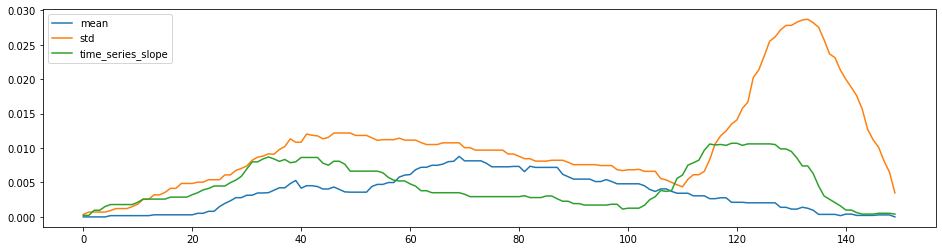

In [4]:
fi = tsf.feature_importances_;
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25));
fi.plot(ax=ax);

### Alternative method via pipelining ###
Besides using the default time-seires forest classifier, feature importances can be calculated if such pipeline is created:

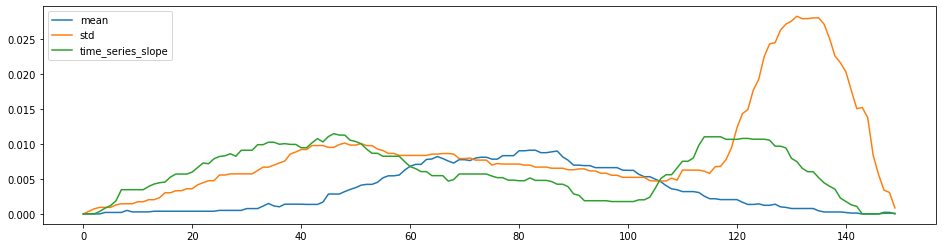

In [5]:
# Specify at least one feature
features = [np.mean, np.std, time_series_slope];
# 'transform' must be the specified first in steps
# RandomIntervalFeatureExtractor must be used as the transformer
steps = [('transform', RandomIntervalFeatureExtractor(features=features)),
         ('clf', DecisionTreeClassifier())];
base_estimator = Pipeline(steps);
tsf_pipeline = TimeSeriesForestClassifier(estimator=base_estimator);
# Fit and obtain feature importances
tsf_pipeline.fit(X_train, y_train);
fi_pipeline = tsf_pipeline.feature_importances_;
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25));
fi_pipeline.plot(ax=ax);